In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from brainflow.data_filter import DataFilter, FilterTypes, AggOperations

In [2]:
dataset = pd.read_csv('A001_RELAX.csv')

In [3]:
dataset.head()

,Unnamed: 0,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Timestamp,Timestamp (Formatted)
0,0,75.0,41172.785156,-568.874207,-20473.302734,-18087.277344,36842.601562,-17150.515625,30402.126953,34801.531250,1.607436e+09,2020-12-08 19:24:02.088
1,1,76.0,41235.414062,-11457.302734,-24090.552734,-22627.765625,36675.097656,-21152.550781,30691.759766,34648.800781,1.607436e+09,2020-12-08 19:24:02.088
2,2,77.0,41535.550781,-26242.712891,-27323.128906,-27170.890625,36393.242188,-21653.564453,31119.238281,34546.476562,1.607436e+09,2020-12-08 19:24:02.088
3,3,78.0,41614.117188,-27117.068359,-27394.609375,-27311.283203,36384.546875,-19474.404297,31103.099609,34605.507812,1.607436e+09,2020-12-08 19:24:02.088
4,4,79.0,41469.257812,-18650.541016,-25384.181641,-24168.851562,36598.765625,-17332.435547,30806.939453,34728.687500,1.607436e+09,2020-12-08 19:24:02.088


In [4]:
dataset.columns

Index(['Unnamed: 0', 'Sample Index', ' EXG Channel 0', ' EXG Channel 1',
       ' EXG Channel 2', ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5',
       ' EXG Channel 6', ' EXG Channel 7', ' Timestamp',
       ' Timestamp (Formatted)'],
      dtype='object')

In [5]:
dataset = dataset.drop(['Sample Index','Unnamed: 0',' Timestamp'], axis=1)

In [6]:
dataset.head()

,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Timestamp (Formatted)
0,41172.785156,-568.874207,-20473.302734,-18087.277344,36842.601562,-17150.515625,30402.126953,34801.531250,2020-12-08 19:24:02.088
1,41235.414062,-11457.302734,-24090.552734,-22627.765625,36675.097656,-21152.550781,30691.759766,34648.800781,2020-12-08 19:24:02.088
2,41535.550781,-26242.712891,-27323.128906,-27170.890625,36393.242188,-21653.564453,31119.238281,34546.476562,2020-12-08 19:24:02.088
3,41614.117188,-27117.068359,-27394.609375,-27311.283203,36384.546875,-19474.404297,31103.099609,34605.507812,2020-12-08 19:24:02.088
4,41469.257812,-18650.541016,-25384.181641,-24168.851562,36598.765625,-17332.435547,30806.939453,34728.687500,2020-12-08 19:24:02.088


In [7]:
dataset[' Timestamp (Formatted)'] = pd.to_datetime(dataset[' Timestamp (Formatted)'])

In [8]:
dataset.describe()

,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7
count,34939.000000,34939.000000,34939.000000,34939.000000,34939.000000,34939.000000,34939.000000,34939.000000
mean,44920.870907,60228.169222,-26951.240353,-24288.519174,41226.553232,-19157.427593,33290.189714,36216.322635
std,1619.169817,17054.070020,3039.178142,4122.196835,2858.783855,2315.394028,1792.234854,1851.487647
min,0.000000,-27263.472656,-36918.351562,-35880.808594,0.000000,-23188.972656,0.000000,0.000000
25%,44167.548828,44718.228516,-28934.333008,-27651.128906,38723.769531,-21109.846680,32465.773438,35409.441406
50%,44406.296875,50224.414062,-27676.957031,-24861.710938,39382.765625,-19399.324219,32719.578125,35658.609375
75%,44863.201172,79828.156250,-24332.890625,-20650.619141,43590.861328,-17350.250000,33076.736328,35846.228516
max,51553.425781,82763.007812,0.000000,0.000000,47006.253906,0.000000,40764.953125,43832.507812


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34939 entries, 0 to 34938
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0    EXG Channel 0          34939 non-null  float64       
 1    EXG Channel 1          34939 non-null  float64       
 2    EXG Channel 2          34939 non-null  float64       
 3    EXG Channel 3          34939 non-null  float64       
 4    EXG Channel 4          34939 non-null  float64       
 5    EXG Channel 5          34939 non-null  float64       
 6    EXG Channel 6          34939 non-null  float64       
 7    EXG Channel 7          34939 non-null  float64       
 8    Timestamp (Formatted)  34939 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8)
memory usage: 2.4 MB


In [10]:
testChannel = pd.DataFrame(dataset[' EXG Channel 0'])

In [11]:
testChannel

,EXG Channel 0
0,41172.785156
1,41235.414062
2,41535.550781
3,41614.117188
4,41469.257812
...,...
34934,44692.222656
34935,44820.542969
34936,44800.851562
34937,44641.640625


## Follow the below steps to filter the noise of the signals
### 1) cancel the gain of the signal
### 2) apply 3rd order highpass filter using brainflow code snippet
### 3) apply 3rd order low pass filter using brainflow code snippets
### 4) get RMS voltage of the signals by multiplying it by 0.707 

In [12]:
testChannel[' EXG Channel 0'] = testChannel[' EXG Channel 0']/24

In [13]:
testChannel.head()

,EXG Channel 0
0,1715.532715
1,1718.142253
2,1730.647949
3,1733.921549
4,1727.885742


In [14]:
test1 = testChannel[' EXG Channel 0'].values

##### syntax for highpass filter 
DataFilter.perform_highpass(data = test1, sampling_rate = 250, cutoff = 0.3, order = 4, filter_type = FilterTypes.BUTTERWORTH.value, ripple = 0)


In [15]:
DataFilter.perform_highpass(test1, 250, 0.3, 4, FilterTypes.BUTTERWORTH.value, 0) #First order HP filter

In [16]:
test1

array([1698.71549328, 1667.83053739, 1647.02392312, ...,    4.37160236,
         -2.27676268,   -7.12405744])

In [17]:
DataFilter.perform_highpass(test1, 250, 0.3, 4, FilterTypes.BUTTERWORTH.value, 0) #Second order HP filter

In [18]:
test1

array([1682.06312952, 1618.34011655, 1565.52606158, ...,    4.18533429,
         -2.48102602,   -7.23344643])

In [19]:
DataFilter.perform_highpass(test1, 250, 0.3, 4, FilterTypes.BUTTERWORTH.value, 0) #Third order HP filter

In [20]:
test1

array([1665.57400746, 1569.65972275, 1486.11431453, ...,    4.60155094,
         -2.08347328,   -6.7424722 ])

###### syntax for lowpass filter
DataFilter.perform_lowpass(data = test1, sampling_rate = 250, cutoff = 0.3, order = 4, filter_type = FilterTypes.CHEBYSHEV_TYPE_1.value, ripple = 1)

In [21]:
DataFilter.perform_lowpass(test1, 250, 95.0, 5, FilterTypes.CHEBYSHEV_TYPE_1.value, 1) #First order LP filter

In [22]:
test1

array([ 318.16563925, 1280.10862407, 1856.94264937, ...,    5.58870138,
          4.14549288,   -2.73026705])

In [23]:
DataFilter.perform_lowpass(test1, 250, 95.0, 5, FilterTypes.CHEBYSHEV_TYPE_1.value, 1) #Second order LP filter

In [25]:
test1

array([6.07774698e+01, 4.31787004e+02, 1.23214449e+03, ...,
       2.62552634e-01, 5.19462448e+00, 3.43319619e+00])

In [26]:
DataFilter.perform_lowpass(test1, 250, 95.0, 5, FilterTypes.CHEBYSHEV_TYPE_1.value, 1) #Third order LP filter

In [27]:
test1

array([ 1.16099930e+01,  1.18252213e+02,  5.13187086e+02, ...,
       -3.89411331e+00,  4.94446425e-01,  4.72373100e+00])

In [32]:
testChannel[' EXG Channel 0'] = testChannel[' EXG Channel 0']*0.707 # RMS Voltage

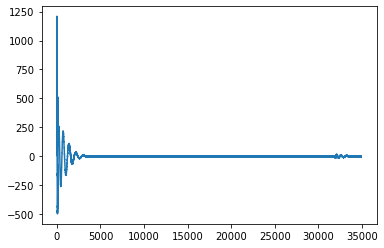

In [33]:
testChannel[' EXG Channel 0'].plot(kind='line')

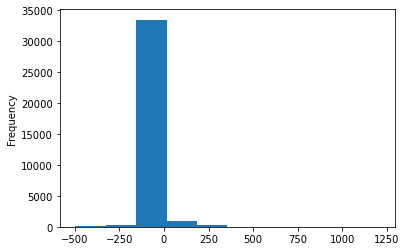

In [34]:
testChannel[' EXG Channel 0'].plot(kind='hist')

In [35]:
testChannel['channel 0'] = testChannel[' EXG Channel 0'].round(2)

In [36]:
testChannel.head()

,EXG Channel 0,channel 0
0,8.208265,8.21
1,83.604315,83.60
2,362.823270,362.82
3,862.630534,862.63
4,1209.852211,1209.85


In [37]:
dataset['channel 0'] = pd.DataFrame(testChannel['channel 0'])

In [38]:
dataset.head(100)

,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Timestamp (Formatted),channel 0
0,41172.785156,-568.874207,-20473.302734,-18087.277344,36842.601562,-17150.515625,30402.126953,34801.531250,2020-12-08 19:24:02.088,8.21
1,41235.414062,-11457.302734,-24090.552734,-22627.765625,36675.097656,-21152.550781,30691.759766,34648.800781,2020-12-08 19:24:02.088,83.60
2,41535.550781,-26242.712891,-27323.128906,-27170.890625,36393.242188,-21653.564453,31119.238281,34546.476562,2020-12-08 19:24:02.088,362.82
3,41614.117188,-27117.068359,-27394.609375,-27311.283203,36384.546875,-19474.404297,31103.099609,34605.507812,2020-12-08 19:24:02.088,862.63
4,41469.257812,-18650.541016,-25384.181641,-24168.851562,36598.765625,-17332.435547,30806.939453,34728.687500,2020-12-08 19:24:02.088,1209.85
...,...,...,...,...,...,...,...,...,...,...
95,41110.042969,-2314.388916,-21376.224609,-18594.548828,36791.730469,-16418.115234,30336.009766,34724.125000,2020-12-08 19:24:02.088,-319.38
96,41082.972656,-7091.180176,-23044.447266,-21118.732422,36714.437500,-20404.929688,30489.566406,34602.109375,2020-12-08 19:24:02.088,-306.58
97,41429.917969,-25011.757812,-27104.216797,-26830.943359,36388.125000,-22204.355469,31031.796875,34469.070312,2020-12-08 19:24:02.088,-298.13
98,41566.507812,-27247.646484,-27385.289062,-27338.351562,36312.285156,-19931.853516,31095.812500,34511.425781,2020-12-08 19:24:02.088,-302.05


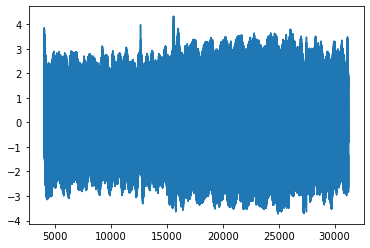

In [49]:
testChannel['channel 0'].iloc[4000:31250].plot(kind='line') #removing initial and final rows 

In [50]:
testChannel = pd.DataFrame(dataset[' EXG Channel 1']/24) #Performing the filtering for channel 2

In [51]:
test1 = testChannel[' EXG Channel 1'].values

for i in range(3):
    DataFilter.perform_highpass(test1, 250, 0.3, 4, FilterTypes.BUTTERWORTH.value, 0) #3rd order HP filter

for i in range(3):
    DataFilter.perform_lowpass(test1, 250, 95.0, 5, FilterTypes.CHEBYSHEV_TYPE_1.value, 1) #3rd order LP filter
    
testChannel[' EXG Channel 1'] = (testChannel[' EXG Channel 1']*0.707).round(2)

In [52]:
testChannel.head()

,EXG Channel 1
0,-0.11
1,-3.33
2,-30.06
3,-138.00
4,-374.79


In [53]:
dataset['channel 1'] = pd.DataFrame(testChannel[' EXG Channel 1'])

In [54]:
testChannel = pd.DataFrame(dataset[' EXG Channel 2']/24) #Performing the filtering for channel 3
test1 = testChannel[' EXG Channel 2'].values

for i in range(3):
    DataFilter.perform_highpass(test1, 250, 0.3, 4, FilterTypes.BUTTERWORTH.value, 0) #3rd order HP filter

for i in range(3):
    DataFilter.perform_lowpass(test1, 250, 95.0, 5, FilterTypes.CHEBYSHEV_TYPE_1.value, 1) #3rd order LP filter
    
testChannel[' EXG Channel 2'] = (testChannel[' EXG Channel 2']*0.707).round(2)
dataset['channel 2'] = pd.DataFrame(testChannel[' EXG Channel 2'])
testChannel.head()

,EXG Channel 2
0,-4.08
1,-42.29
2,-188.31
3,-466.80
4,-703.47


In [55]:
testChannel = pd.DataFrame(dataset[' EXG Channel 3']/24) #Performing the filtering for channel 4
test1 = testChannel[' EXG Channel 3'].values

for i in range(3):
    DataFilter.perform_highpass(test1, 250, 0.3, 4, FilterTypes.BUTTERWORTH.value, 0) #3rd order HP filter

for i in range(3):
    DataFilter.perform_lowpass(test1, 250, 95.0, 5, FilterTypes.CHEBYSHEV_TYPE_1.value, 1) #3rd order LP filter
    
testChannel[' EXG Channel 3'] = (testChannel[' EXG Channel 3']*0.707).round(2)
dataset['channel 3'] = pd.DataFrame(testChannel[' EXG Channel 3'])
testChannel.head()

,EXG Channel 3
0,-3.61
1,-37.63
2,-169.43
3,-427.68
4,-664.37


In [56]:
testChannel = pd.DataFrame(dataset[' EXG Channel 4']/24) #Performing the filtering for channel 5
test1 = testChannel[' EXG Channel 4'].values

for i in range(3):
    DataFilter.perform_highpass(test1, 250, 0.3, 4, FilterTypes.BUTTERWORTH.value, 0) #3rd order HP filter

for i in range(3):
    DataFilter.perform_lowpass(test1, 250, 95.0, 5, FilterTypes.CHEBYSHEV_TYPE_1.value, 1) #3rd order LP filter
    
testChannel[' EXG Channel 4'] = (testChannel[' EXG Channel 4']*0.707).round(2)


KeyError: ' EXG Channel '

In [57]:
dataset['channel 4'] = pd.DataFrame(testChannel[' EXG Channel 4'])
testChannel.head()

,EXG Channel 4
0,7.34
1,74.77
2,324.10
3,768.80
4,1072.99


In [58]:
testChannel = pd.DataFrame(dataset[' EXG Channel 5']/24) #Performing the filtering for channel 6
test1 = testChannel[' EXG Channel 5'].values

for i in range(3):
    DataFilter.perform_highpass(test1, 250, 0.3, 4, FilterTypes.BUTTERWORTH.value, 0) #3rd order HP filter

for i in range(3):
    DataFilter.perform_lowpass(test1, 250, 95.0, 5, FilterTypes.CHEBYSHEV_TYPE_1.value, 1) #3rd order LP filter
    
testChannel[' EXG Channel 5'] = (testChannel[' EXG Channel 5']*0.707).round(2)
dataset['channel 5'] = pd.DataFrame(testChannel[' EXG Channel 5'])
testChannel.head()

,EXG Channel 5
0,-3.42
1,-35.62
2,-159.28
3,-394.67
4,-585.56


In [59]:
testChannel = pd.DataFrame(dataset[' EXG Channel 6']/24) #Performing the filtering for channel 7
test1 = testChannel[' EXG Channel 6'].values

for i in range(3):
    DataFilter.perform_highpass(test1, 250, 0.3, 4, FilterTypes.BUTTERWORTH.value, 0) #3rd order HP filter

for i in range(3):
    DataFilter.perform_lowpass(test1, 250, 95.0, 5, FilterTypes.CHEBYSHEV_TYPE_1.value, 1) #3rd order LP filter
    
testChannel[' EXG Channel 6'] = (testChannel[' EXG Channel 6']*0.707).round(2)
dataset['channel 6'] = pd.DataFrame(testChannel[' EXG Channel 6'])
testChannel.head()

,EXG Channel 6
0,6.06
1,61.78
2,268.45
3,639.52
4,900.08


In [60]:
testChannel = pd.DataFrame(dataset[' EXG Channel 7']/24) #Performing the filtering for channel 8
test1 = testChannel[' EXG Channel 7'].values

for i in range(3):
    DataFilter.perform_highpass(test1, 250, 0.3, 4, FilterTypes.BUTTERWORTH.value, 0) #3rd order HP filter

for i in range(3):
    DataFilter.perform_lowpass(test1, 250, 95.0, 5, FilterTypes.CHEBYSHEV_TYPE_1.value, 1) #3rd order LP filter
    
testChannel[' EXG Channel 7'] = (testChannel[' EXG Channel 7']*0.707).round(2)
dataset['channel 7'] = pd.DataFrame(testChannel[' EXG Channel 7'])
testChannel.head()

,EXG Channel 7
0,6.94
1,70.63
2,306.19
3,726.61
4,1015.23


In [61]:
dataset.head()

,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Timestamp (Formatted),channel 0,channel 1,channel 2,channel 3,channel 4,channel 5,channel 6,channel 7
0,41172.785156,-568.874207,-20473.302734,-18087.277344,36842.601562,-17150.515625,30402.126953,34801.531250,2020-12-08 19:24:02.088,8.21,-0.11,-4.08,-3.61,7.34,-3.42,6.06,6.94
1,41235.414062,-11457.302734,-24090.552734,-22627.765625,36675.097656,-21152.550781,30691.759766,34648.800781,2020-12-08 19:24:02.088,83.60,-3.33,-42.29,-37.63,74.77,-35.62,61.78,70.63
2,41535.550781,-26242.712891,-27323.128906,-27170.890625,36393.242188,-21653.564453,31119.238281,34546.476562,2020-12-08 19:24:02.088,362.82,-30.06,-188.31,-169.43,324.10,-159.28,268.45,306.19
3,41614.117188,-27117.068359,-27394.609375,-27311.283203,36384.546875,-19474.404297,31103.099609,34605.507812,2020-12-08 19:24:02.088,862.63,-138.00,-466.80,-427.68,768.80,-394.67,639.52,726.61
4,41469.257812,-18650.541016,-25384.181641,-24168.851562,36598.765625,-17332.435547,30806.939453,34728.687500,2020-12-08 19:24:02.088,1209.85,-374.79,-703.47,-664.37,1072.99,-585.56,900.08,1015.23


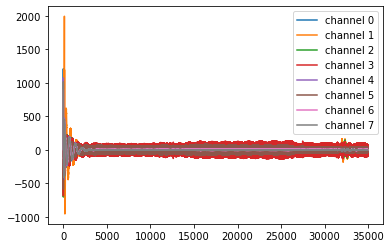

In [65]:
dataset[['channel 0','channel 1','channel 2','channel 3','channel 4','channel 5','channel 6','channel 7']].plot(kind='line')

#### You can see that the values of all the channels are well under the range of -100 to +100micro volts

In [66]:
dataset.describe()

,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,channel 0,channel 1,channel 2,channel 3,channel 4,channel 5,channel 6,channel 7
count,34939.000000,34939.000000,34939.000000,34939.000000,34939.000000,34939.000000,34939.000000,34939.000000,34939.000000,34939.000000,34939.000000,34939.000000,34939.000000,34939.000000,3.493900e+04,34939.000000
mean,44920.870907,60228.169222,-26951.240353,-24288.519174,41226.553232,-19157.427593,33290.189714,36216.322635,-0.000104,0.003083,-0.001736,-0.000771,-0.000544,-0.000765,-2.862131e-07,-0.000114
std,1619.169817,17054.070020,3039.178142,4122.196835,2858.783855,2315.394028,1792.234854,1851.487647,38.887723,72.098277,57.428264,78.827125,34.551164,48.510004,2.958638e+01,32.639427
min,0.000000,-27263.472656,-36918.351562,-35880.808594,0.000000,-23188.972656,0.000000,0.000000,-497.240000,-955.340000,-703.470000,-685.710000,-441.470000,-585.560000,-3.708900e+02,-415.090000
25%,44167.548828,44718.228516,-28934.333008,-27651.128906,38723.769531,-21109.846680,32465.773438,35409.441406,-2.240000,-11.575000,-51.760000,-73.610000,-2.860000,-41.515000,-4.480000e+00,-1.430000
50%,44406.296875,50224.414062,-27676.957031,-24861.710938,39382.765625,-19399.324219,32719.578125,35658.609375,0.050000,-0.200000,-0.330000,-0.140000,-0.000000,-0.360000,9.000000e-02,-0.010000
75%,44863.201172,79828.156250,-24332.890625,-20650.619141,43590.861328,-17350.250000,33076.736328,35846.228516,2.240000,11.410000,52.285000,72.270000,2.860000,42.145000,4.590000e+00,1.420000
max,51553.425781,82763.007812,0.000000,0.000000,47006.253906,0.000000,40764.953125,43832.507812,1209.850000,1994.320000,363.570000,383.990000,1072.990000,283.050000,9.000800e+02,1015.230000


In [67]:
dataset.to_csv('cleaned.csv')

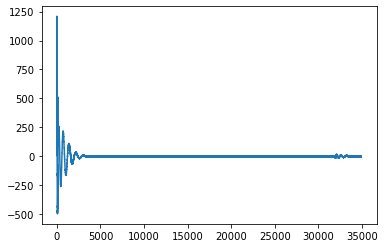

In [69]:
dataset['channel 0'].plot(kind='line')

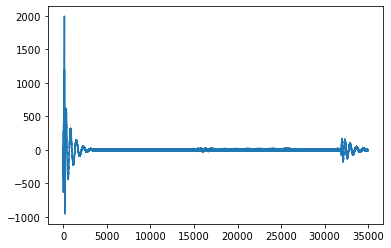

In [70]:
dataset['channel 1'].plot(kind='line')

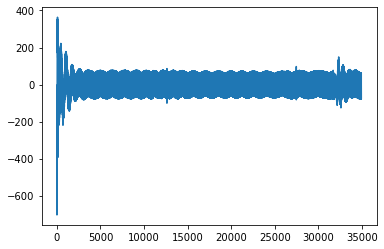

In [71]:
dataset['channel 2'].plot(kind='line')

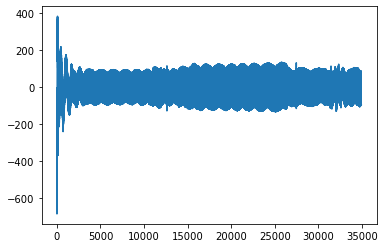

In [72]:
dataset['channel 3'].plot(kind='line')

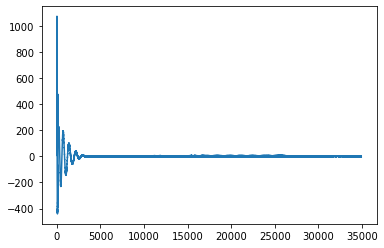

In [73]:
dataset['channel 4'].plot(kind='line')

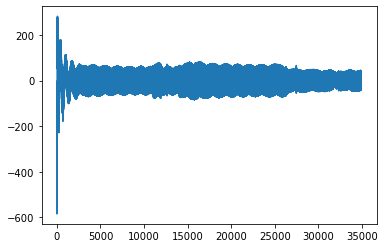

In [74]:
dataset['channel 5'].plot(kind='line')

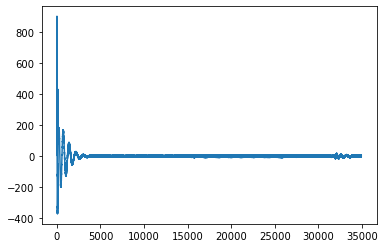

In [75]:
dataset['channel 6'].plot(kind='line')

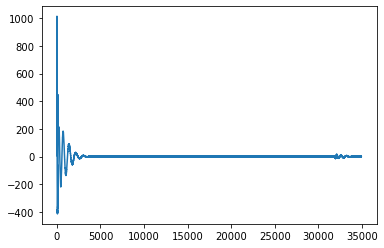

In [76]:
dataset['channel 7'].plot(kind='line')

In [78]:
dataset[' Timestamp (Formatted)'].iloc[4000]

Timestamp('2020-12-08 19:24:18.040000')

In [79]:
dataset[' Timestamp (Formatted)'].iloc[31250]

Timestamp('2020-12-08 19:26:06.814000')

In [ ]:
dataset[' EXG Channel 0'].plot(kind='hist')